# Aula 4 - Plotly

[Documentação Plotly Express](https://plotly.com/python-api-reference/plotly.express.html)

### Imports e Configurações

In [ ]:
# !pip install plotly
# !pip install -U kaleido
# !pip install -U nbformat
# !pip install statsmodels

In [1]:
# importando a biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# definindo as configurações

# autoreload permite a recarga dos módulos antes da execução dos códigos
# doc: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

### Carregando as Bases de Dados

In [3]:
# importando a base 'flights' do seaborn
flights =sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# importando a base 'penguins' do seaborn

peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Gráficos

Processo de plotagem:
1. entender os dados
2. entender a questão de negócio
3. realizar as transformações necessárias
4. realizar a plotagem

Documentação:

https://plotly.com/python-api-reference/

#### Gráfico de Barras

In [6]:
# observando a base de dados

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a quantidade de pinguins por ilha?

Comparativo da sintaxe:

* Seaborn

    > `sns.countplot(data=df_data, x='x_data')`

* Plotly

    > `px.histogram(data_frame=df_data, x='x_data')`

<AxesSubplot: xlabel='island', ylabel='count'>

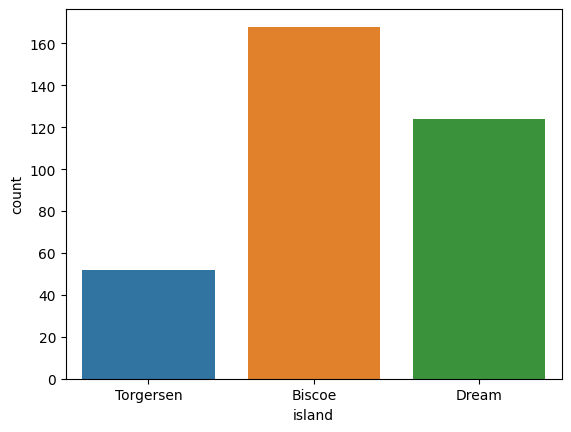

In [7]:
# visualizando com o seaborn - countplot
sns.countplot(data=peng, x='island')


In [8]:
# visualizando com o plotly - bar

px.bar(data_frame=peng, x='island')

In [9]:
# realizando transformações

x_bar=peng['island'].value_counts().index
y_bar=peng['island'].value_counts().values

In [11]:
px.bar(x=x_bar, y=y_bar)

In [12]:
# visualizando com o histogram - bar
px.histogram(data_frame=peng, x='island')


Qual a quantidade de pinguins por ilha e segmentado por sexo?

<AxesSubplot: xlabel='island', ylabel='count'>

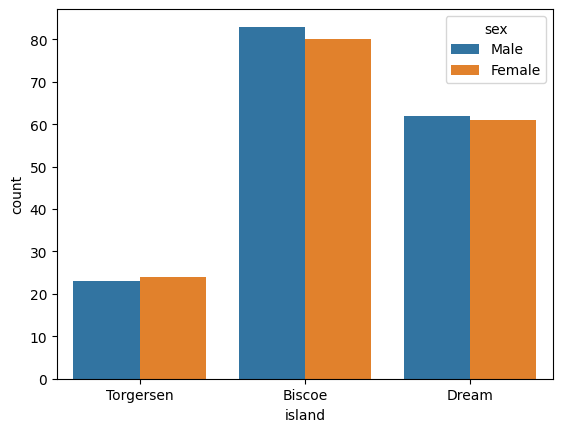

In [13]:
# visualizando com o seaborn - countplot
sns.countplot(data=peng, x='island', hue='sex')



In [14]:
# visualizando com o histogram - bar
px.histogram(data_frame=peng, x='island', color='sex')


In [15]:
# visualizando lado a lado
px.histogram(data_frame=peng, x='island', color='sex', barmode='group')


Qual a média do comprimento da nadadeira por ilha, segmentado por espécie?

Comparativo da sintaxe:

* Seaborn

    > `sns.barplot(data=df_data, x='x_data', y='y_data', estimator='mean')`

* Plotly

    > `px.histogram(data_frame=df_data, x='x_data', y='y_data', histfunc='avg')`
    count', 'sum', 'avg', 'min', e 'max'

In [16]:
# base de dados pinguins

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot: xlabel='island', ylabel='flipper_length_mm'>

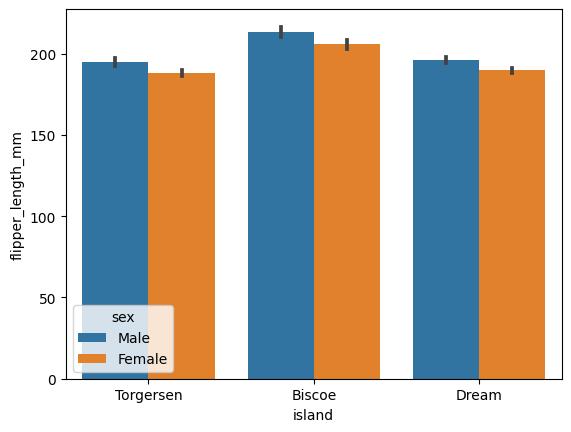

In [18]:
# utilizando o seaborn - barplot

sns.barplot(data=peng, x='island', y='flipper_length_mm', hue='sex')

In [23]:
# utilizando o plotly - histogram

px.histogram(data_frame=peng,
             x='island',
             y='flipper_length_mm',
             color='species',
             barmode='group',
             histfunc='avg',
             text_auto='.1f')

#### Estilizando um Gráfico

Transformando o layout completo do gráfico do plotly:
*    xaxis_title - titulo eixo x
*    yaxis_title - titulo eixo y
*    legend_title - titulo da legenda
*    font_color - cor da fonte
*    title - titulo do gráfico
*    template - template de formato do gráfico

In [24]:
# atribuindo o gráfico a uma variável 

fig= px.histogram(data_frame=peng,
             x='island',
             y='flipper_length_mm',
             color='species',
             barmode='group',
             histfunc='avg',
             text_auto='.1f')

In [30]:
# alterando os parâmetros estéticos do gráfico

fig.update_layout(
    xaxis_title={
        'text': 'Ilha',
        'font_size': 12
    },
    yaxis_title={
        'text': 'Média da Nadadeira',
        'font_size': 12
    },
    legend_title={
        'text': 'Espécie',
        'font_size': 12
    },
    font_color='grey',
    font_size=10,
    title={
        'text': 'Média do Comprimento da Nadadeira por Ilha e Sexo',
        'font_family': 'Verdana',
        'font_color': 'black',
        'font_size': 16
    },
    template='presentation'

)

Outros templates:
- ggplot2,
- seaborn,
- simple_white,
- plotly,
- plotly_white,
- plotly_dark,
- presentation,
- xgridoff,
- ygridoff,
- gridon,
- none

In [31]:
# alterando o template
fig.update_layout(template='seaborn')

#### Exportando um Gráfico

In [32]:
# exportando o gráfico em uma página html
fig.write_html('grafico.html')

In [33]:
# exportando o gráfico como uma figura
fig.write_image('grafico.png')

#### Gráfico de Histograma

In [40]:
# observando o dataframe
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a distribuição da massa corporal facetado por sexo e espécie?

In [34]:
# visualizando a distribuição com plotly - histogram
px.histogram(data_frame=peng, x='body_mass_g')

In [42]:
# facetando a visualização
px.histogram(data_frame=peng.dropna(), x='body_mass_g', color='sex', facet_col='sex', facet_row='species', height=700)

#### Gráfico de Caixa

In [43]:
# base de dados penguins

peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Temos outliers no peso corporal dos pinguins?

In [44]:
# visualizando a distibuição com plotly - boxp

px.box(data_frame=peng, y='body_mass_g')

In [47]:
# segmentando a distribuição por sexo

px.box(data_frame=peng, y='body_mass_g', x='sex', color='species')

In [ ]:
# segmentando a distribuição por sexo e espécie



#### Gráfico de Linhas

In [48]:
# base de dados flights

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Qual a quantidade de passageiros por ano?

In [52]:
# transformando os dados

x_line=flights.groupby('year')['passengers'].sum().index
y_line=flights.groupby('year')['passengers'].sum().values

In [55]:
# visualizando com plotly - line

px.line(x=x_line, y=y_line, markers=True)

Qual a média de passageiros por ano?

In [56]:
# visualizando a média de passageiros por ano com plotly - line
x_line=flights.groupby('year')['passengers'].mean().index
y_line=flights.groupby('year')['passengers'].mean().values
px.line(x=x_line, y=y_line, markers=True)

Qual a quantidade de passageiros por ano, segmentado por mês?

In [57]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [63]:
# visualizando com ploty - line

px.line(data_frame=flights, x='year', y='passengers', color='month')
linhas=px.line(data_frame=flights, x='year', y='passengers', color='month')


In [62]:
# transformando o layout do gráfico do plotly
linhas.update_layout(template='plotly_dark')

#### Gráfico de Dispersão

In [65]:
# base de dados pinguins
px.scatter(data_frame=peng, x='bill_length_mm',	y='bill_depth_mm')


Qual a relação entre o comprimento e a profundidado do bico?

In [ ]:
# visualizando com plotly - scatter



In [ ]:
# segmentando por espécie



In [68]:
# adicionando linha de tendencia

px.scatter(data_frame=peng, x='bill_length_mm',	y='bill_depth_mm', trendline='ols', color='species')

In [ ]:
# segmentando por espécie e adicionando linhas de tendencia



### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#### Questão 1

Criar 2 vetores, um com uma série historica de anos de 1970 até 2022 e um segundo vetor com a mesma quantidade de observações e números inteiros aleatórios variando de 1 a 20000. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express.

In [5]:
anos = np.arange(1970, 2023)
valores = np.random.randint(1, 20001, len(anos))

px.line(x=anos, y=valores)


#### Questão 2

Criar uma lista com as letras do alfabeto, depois um vetor com a mesma quantidade de observações e números inteiros aleatórios variando de 10 a 100. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express.

Utilize o objeto string para resolver a questão:

```
import string
string.ascii_lowercase
```

In [3]:
import string
letras=list(string.ascii_lowercase)
letras

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [4]:
num = np.random.randint(10,101, len(letras))
num

array([21, 41, 69, 15, 45, 82, 51, 39, 40, 91, 79, 19, 96, 83, 29, 51, 79,
       29, 50, 80, 99, 34, 89, 97, 49, 29])

In [6]:
px.bar(x=letras, y=num, text=num, color=letras)

#### Questão 3

Criar 2 vetores com a mesma quantidade de observações, 500 registros , de números inteiros aleatórios, o primeiro variando de 1000 a 2000, o segundo variando de 5000 a 10000. Em seguida montar um gráfico com a melhor visualização para os dados com a biblioteca Plotly Express, demonstrando relação entre as variáveis.

In [8]:
arr1=np.random.randint(1000, 2001, 500)
arr2=np.random.randint(5000, 10001, 500)

In [10]:
px.scatter(x=arr1, y=arr2, trendline='ols')

#### Questão 4

Criar uma vetor com 500 registros de números inteiros variando entre 125 e 857. Em seguida montar um gráfico que mostre a dispersão com a melhor visualização para os dados com a biblioteca Plotly Express.

In [11]:
vet = np.random.randint(125, 858, 500)

In [12]:
px.histogram(x=vet)

In [13]:
px.box(y=vet)